In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score as acc
import matplotlib.pyplot as plt

In [55]:
dataset = pd.read_csv('dataset_v0.csv')

In [56]:
# drop unnecessary features
drops = ['Number', 'title', 'artist', 'top genre']

for drop in drops:
    dataset = dataset.drop(drop, axis=1)

In [57]:
# X for features and y for target
X = dataset.drop('pop', axis=1)
y = dataset['pop']

# split into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Feature selection by ExtraTreesRegressor(model based)
regressor= ExtraTreesRegressor()

regressor.fit(X_train, y_train)

ExtraTreesRegressor()

In [59]:
regressor.feature_importances_

array([0.1315101 , 0.05100388, 0.06679683, 0.0688105 , 0.11131056,
       0.04766263, 0.07259804, 0.16620681, 0.20966236, 0.07443828])

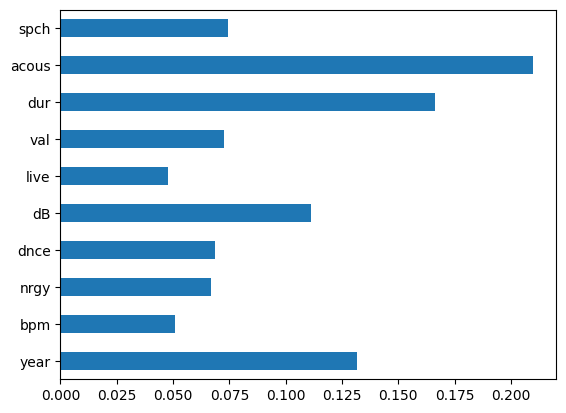

In [60]:
feat_importances = pd.Series(regressor.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

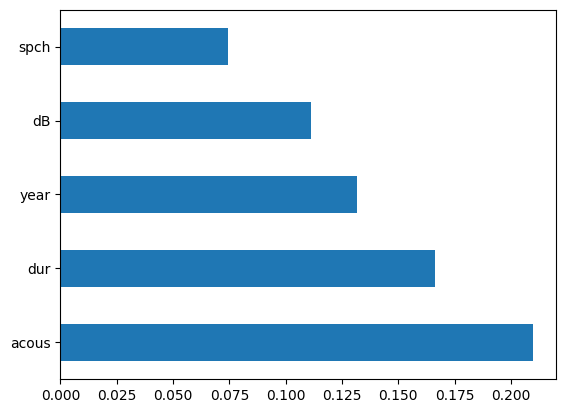

In [61]:
feat_importances.nlargest(5).plot(kind='barh')
plt.show()